In [55]:
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [37]:
BATCH_SIZE = 64
EPOCHS = 100

In [38]:
data = tf.keras.datasets.fashion_mnist.load_data()

In [39]:
(x_train, y_train), (x_test, y_test) = data

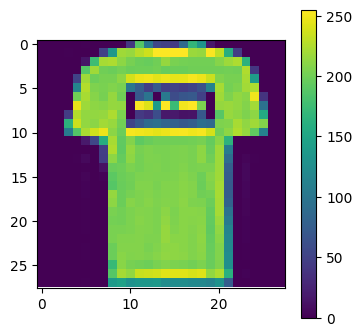

In [40]:
plt.figure(figsize=[4, 4])
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

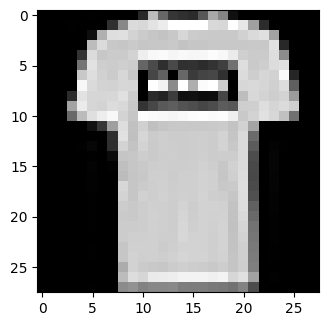

In [41]:
plt.figure(figsize=[8, 8])
plt.subplot(1,2,1)
plt.imshow(x_train[1,:,:], cmap='gray')
plt.show()

In [45]:
x_train = x_train.reshape(-1, 784) / 255.
x_test = x_test.reshape(-1, 784) / 255.

In [46]:
(x_train, y_train), (x_test, y_test) = (shuffle(x_train, y_train), shuffle(x_test, y_test))

In [47]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 784), (60000,)), ((10000, 784), (10000,)))

### Creating a neural network models

In [58]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', ))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(learning_rate=1e-3), metrics=['accuracy'])

In [60]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [61]:
early_stopping = EarlyStopping('loss', patience=5)
lr_scheduler = LearningRateScheduler(scheduler)
callbacks = [early_stopping, lr_scheduler]

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/100
938/938 [==============================] - 32s 26ms/step - loss: 0.5454 - accuracy: 0.8065 - val_loss: 0.4495 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 2/100
938/938 [==============================] - 19s 20ms/step - loss: 0.3887 - accuracy: 0.8598 - val_loss: 0.3892 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 3/100
938/938 [==============================] - 26s 28ms/step - loss: 0.3465 - accuracy: 0.8745 - val_loss: 0.3671 - val_accuracy: 0.8683 - lr: 0.0010
Epoch 4/100
938/938 [==============================] - 23s 25ms/step - loss: 0.3212 - accuracy: 0.8822 - val_loss: 0.3548 - val_accuracy: 0.8715 - lr: 0.0010
Epoch 5/100
938/938 [==============================] - 20s 22ms/step - loss: 0.2994 - accuracy: 0.8910 - val_loss: 0.3357 - val_accuracy: 0.8774 - lr: 0.0010
Epoch 6/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2845 - accuracy: 0.8959 - val_loss: 0.3488 - val_accuracy: 0.8768 - lr: 0.0010
Epoch 7/100
938/938 [==============================]

In [62]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9036999940872192


#### Conclusion
Today we have created a neural network for classifying images from the fashion mnist dataset. We used dense and dropout layers. The result was quite good!  
Accuracy on test data: 90.36%  
Learning time: 1334s  